In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df =pd.read_csv(r"C:\Users\Vivian\MovieGenre.csv",encoding = "ISO-8859-1")

In [2]:
na_mask =df.isna()
rows_with_na = df[na_mask.any(axis=1)]

genres_df =df["Genre"].str.get_dummies(sep ="|")
df =df.join(genres_df)
df =df.drop("Genre", axis=1)

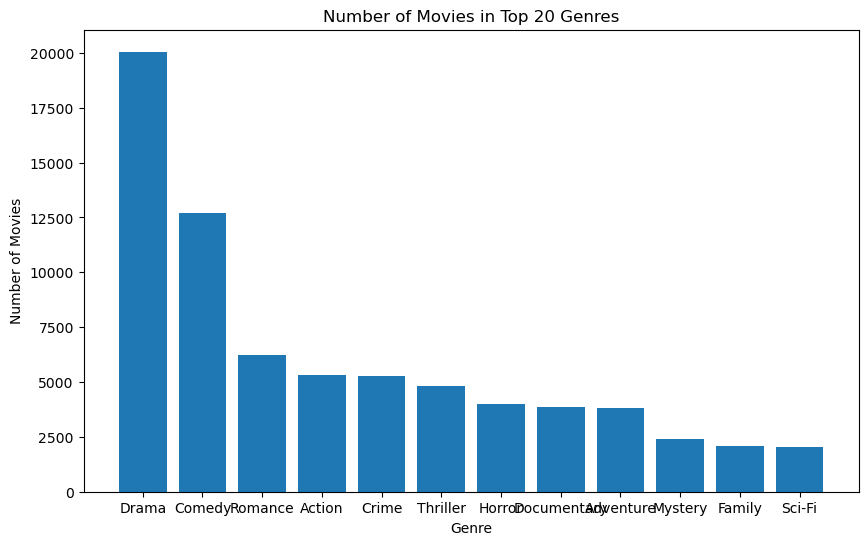

In [3]:
genre_counts =genres_df.sum().sort_values(ascending =False)[:12]
plt.figure(figsize =(10,6))
plt.bar(genre_counts.index, genre_counts.values)
plt.title('Number of Movies in Top 20 Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.show()

In [4]:
genres_df

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40103,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
40104,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40106,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


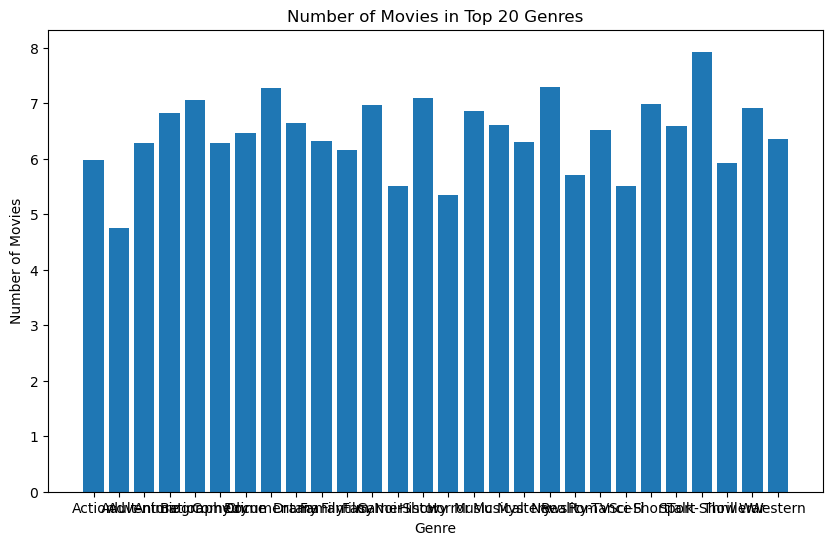

In [5]:
mean_score =[]
for genre in genres_df.columns:
    summation =df[df[genre] == 1]['IMDB Score'].sum()
    counts = df[df[genre] == 1]['IMDB Score'].count()
    mean_score.append(summation/counts)

plt.figure(figsize =(10,6))
plt.bar(genres_df.columns, mean_score)
plt.title('Number of Movies in Top 20 Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.show()

In [6]:
genres_df.columns

Index(['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir',
       'Game-Show', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show',
       'Thriller', 'War', 'Western'],
      dtype='object')

In [7]:
mean_score

[5.9811079812206565,
 4.75,
 6.286895108553492,
 6.830034324942791,
 7.059929789368105,
 6.277822485207102,
 6.458519924098672,
 7.281216041397155,
 6.647542537797516,
 6.317246307765602,
 6.158756218905473,
 6.962779156327543,
 5.5,
 7.094600280504909,
 5.354438314944835,
 6.865247678018577,
 6.605331753554502,
 6.303508771929824,
 7.292682926829269,
 5.699999999999999,
 6.520237903873975,
 5.515453194650817,
 6.993945127719963,
 6.593210749646394,
 7.928571428571429,
 5.916126350789693,
 6.909812286689421,
 6.363423212192263]

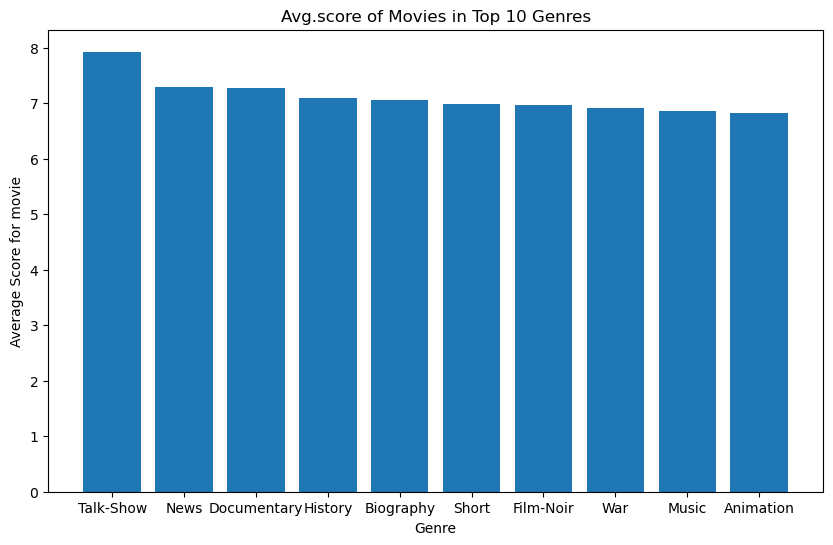

In [8]:
tmp =zip(mean_score, genres_df.columns)
mean_score_genres =[]
for x in tmp:
    mean_score_genres.append((x[0], x[1]))
mean_score_genres =sorted(mean_score_genres, key =lambda x: -x[0])

plt.figure(figsize =(10,6))

plt.bar([x[1] for x in mean_score_genres][:10], [x[0] for x in mean_score_genres][:10])
plt.title('Avg.score of Movies in Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Average Score for movie')
plt.show()

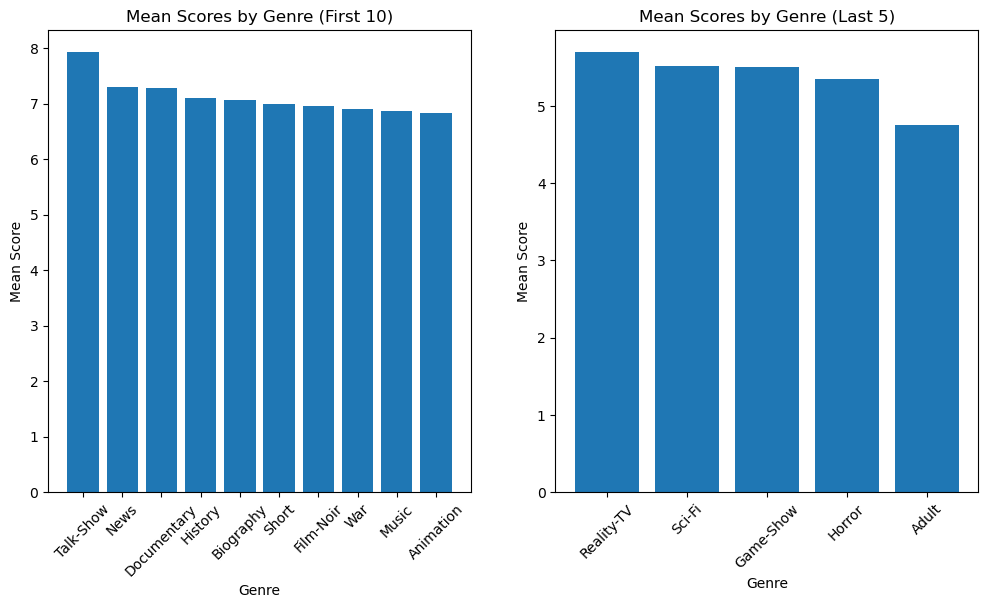

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Create a barplot of the first 10 mean scores in the first subplot
axs[0].bar([x[1] for x in mean_score_genres][:10], [x[0] for x in mean_score_genres][:10])
axs[0].set_title('Mean Scores by Genre (First 10)')
axs[0].set_xlabel('Genre')
axs[0].set_ylabel('Mean Score')
axs[0].tick_params(axis='x', labelrotation=45)

# Create a barplot of the last 2 mean scores in the second subplot
axs[1].bar([x[1] for x in mean_score_genres][-5:], [x[0] for x in mean_score_genres][-5:])
axs[1].set_title('Mean Scores by Genre (Last 5)')
axs[1].set_xlabel('Genre')
axs[1].set_ylabel('Mean Score')
axs[1].tick_params(axis='x', labelrotation=45)

# Display the plots
plt.show()

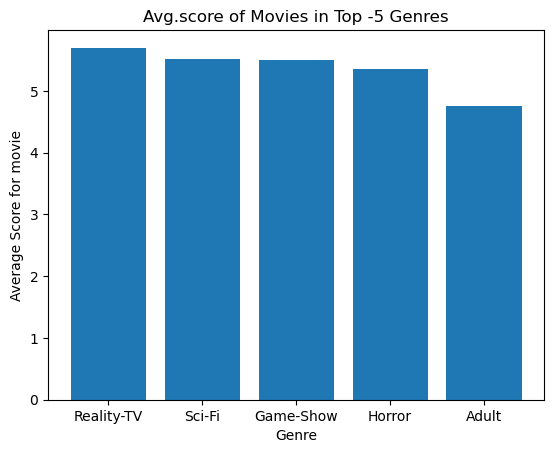

In [10]:
plt.bar([x[1] for x in mean_score_genres][-5:], [x[0] for x in mean_score_genres][-5:])
plt.title('Avg.score of Movies in Top -5 Genres')
plt.xlabel('Genre')
plt.ylabel('Average Score for movie')
plt.show()

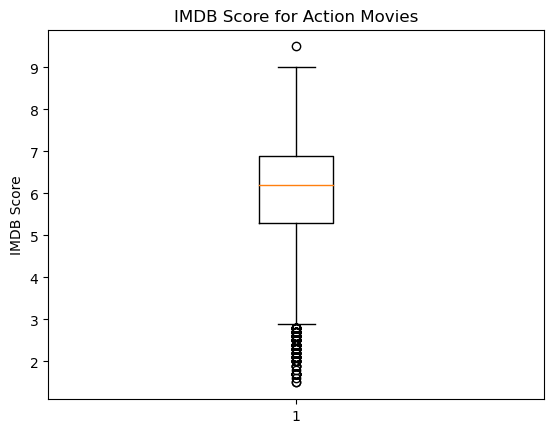

In [11]:
action_movies = df[df['Action'] == 1]
action_movies = action_movies.dropna(subset=['IMDB Score'])  # drop rows with missing values
plt.boxplot(action_movies['IMDB Score'])
plt.title('IMDB Score for Action Movies')
plt.ylabel('IMDB Score')
plt.show()


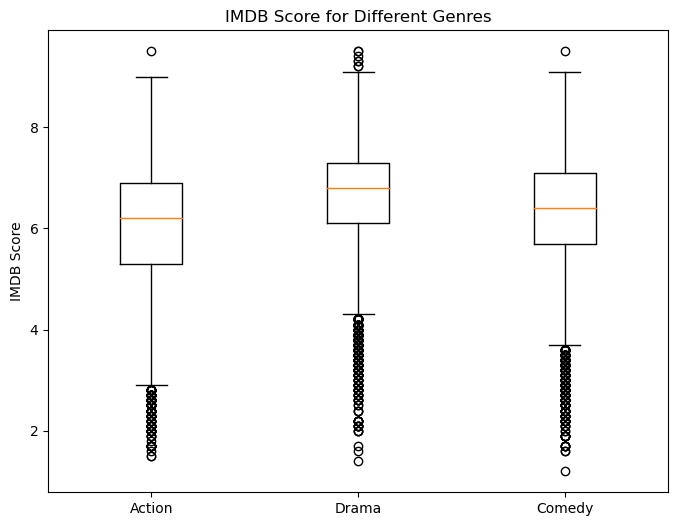

In [12]:
# Filter the DataFrame to get rows where the 'Action', 'Drama', and 'Comedy' columns are equal to 1
action_movies = df[df['Action'] == 1].dropna(subset=['IMDB Score'])
drama_movies = df[df['Drama'] == 1].dropna(subset=['IMDB Score'])
comedy_movies = df[df['Comedy'] == 1].dropna(subset=['IMDB Score'])

fig, ax = plt.subplots(figsize=(8,6))

ax.boxplot([action_movies['IMDB Score'], drama_movies['IMDB Score'], comedy_movies['IMDB Score']])

ax.set_title('IMDB Score for Different Genres')
ax.set_ylabel('IMDB Score')
ax.set_xticklabels(['Action', 'Drama', 'Comedy'])
plt.show()


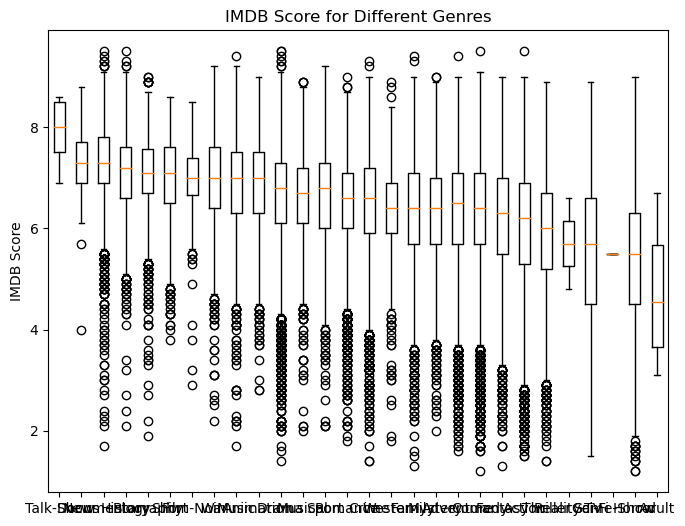

In [13]:
boxplot_score =[]
for x in [x[1] for x in mean_score_genres]:
    x_movies =df[df[x] == 1].dropna(subset=['IMDB Score'])
    boxplot_score.append(x_movies['IMDB Score'])

    
fig, ax = plt.subplots(figsize=(8,6))
ax.boxplot(boxplot_score)
ax.set_title('IMDB Score for Different Genres')
ax.set_ylabel('IMDB Score')
ax.set_xticklabels([x[1] for x in mean_score_genres])
plt.show()

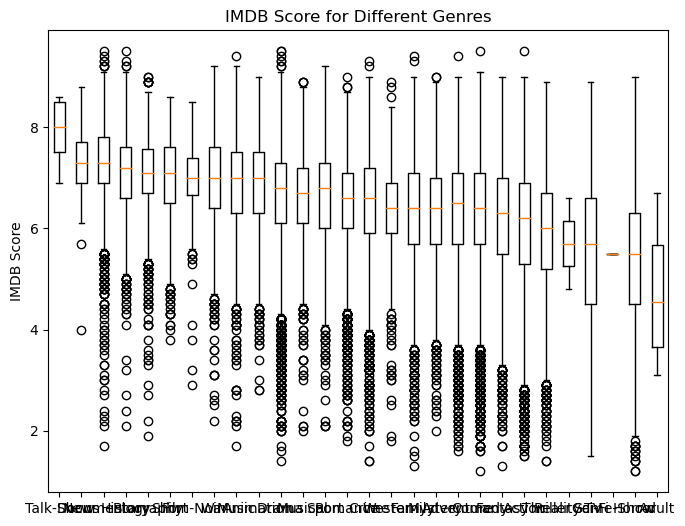

In [14]:
fig, ax = plt.subplots(figsize=(8,6))
ax.boxplot(boxplot_score)
ax.set_title('IMDB Score for Different Genres')
ax.set_ylabel('IMDB Score')
ax.set_xticklabels([x[1] for x in mean_score_genres])
plt.show()

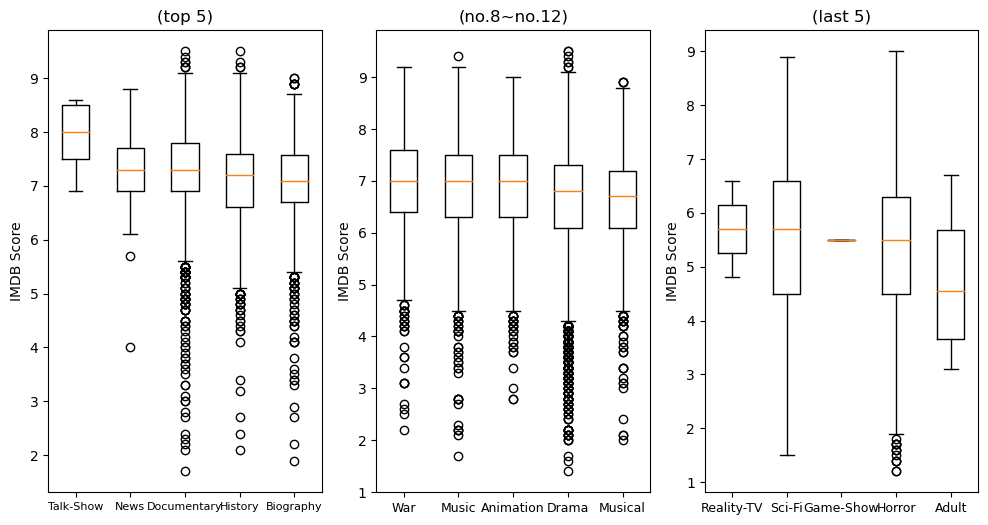

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

# Create a barplot of the first 10 mean scores in the first subplot
axs[0].boxplot(boxplot_score[:5])
axs[0].set_title('(top 5)')
axs[0].set_ylabel('IMDB Score')
axs[0].set_xticklabels([x[1] for x in mean_score_genres][:5], fontsize=8)

# Create a barplot of the last 2 mean scores in the second subplot
axs[1].boxplot(boxplot_score[7:12])
axs[1].set_title('(no.8~no.12)')
axs[1].set_ylabel('IMDB Score')
axs[1].set_xticklabels([x[1] for x in mean_score_genres][7:12], fontsize=9)


axs[2].boxplot(boxplot_score[-5:])
axs[2].set_title('(last 5)')
axs[2].set_ylabel('IMDB Score')
axs[2].set_xticklabels([x[1] for x in mean_score_genres][-5:], fontsize=9)


# Display the plots
plt.show()

In [16]:
correlations =genres_df.corr()

In [17]:
corr_crime =genres_df.corrwith(genres_df['Crime']).sort_values(ascending =False)
top_corr_crime =corr_crime[corr_crime.index != 'Crime'].head(3)
top_corr_crime

Film-Noir    0.182812
Action       0.157292
Thriller     0.129917
dtype: float64